In [4]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import random
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [5]:
np.random.seed(500)
Corpus = pd.read_csv(r"../input_data/smoking/labelled_smoking.csv",encoding='latin-1')
Corpus = Corpus.rename({'roken_report_content':'text', 'roken_answer_label': 'label'}, axis=1)
Corpus['text'] = Corpus['text'].str.replace('\t',' ')
Corpus.drop(['Unnamed: 0'], axis=1, inplace=True)
Corpus.drop_duplicates(inplace=True)
Corpus['text'] = Corpus['text'].astype(str)

In [6]:
# Preprocessing
stemmer = SnowballStemmer("dutch")
Corpus['text'] = Corpus['text'].str.lower()
Corpus['text'] = [stemmer.stem(text) for text in Corpus['text']]
Corpus['label'] = Corpus['label'].str.replace('Niets gevonden','Rookt niet')
Corpus['label'] = Corpus['label'].str.replace('Rookte','Rookt niet')
Corpus = Corpus.drop(Corpus[Corpus.label == '--'].index)
Corpus_backup = Corpus.copy()

In [7]:
stopwords_filter = ['niet', 'niets', 'geen', 'zonder']
with open('../helping_files/stopwords.txt') as file:
    full_stopwords = [line.rstrip() for line in file]
    filtered_stopwords = [item for item in full_stopwords if item not in stopwords_filter]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

# Multinomial Naive Bayes

In [9]:
class_priors = [list(item) for item in list(np.random.dirichlet(np.ones(2), size=5))]
parameter_grid = {
                  'clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'clf__fit_prior': [True, False],
                  'clf__class_prior': random.sample(class_priors, k=len(class_priors)),
                  'tfidf__max_df': [0.90, 0.95],
                  'tfidf__min_df': [3, 5]
                 }

# Only negation stopwords kept

In [13]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.587 total time=  23.0s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.586 total time=  23.0s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.580 total time=  23.4s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.585 total time=  26.4s
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.584 total time=  32.1s
[CV 1/5] END clf__alpha=10, clf__class_

[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.584 total time=  23.5s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.577 total time=  23.2s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.581 total time=  23.6s
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.4013117050654326, 0.5986882949345673], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.580 total time=  23.1s
0.92797607044431


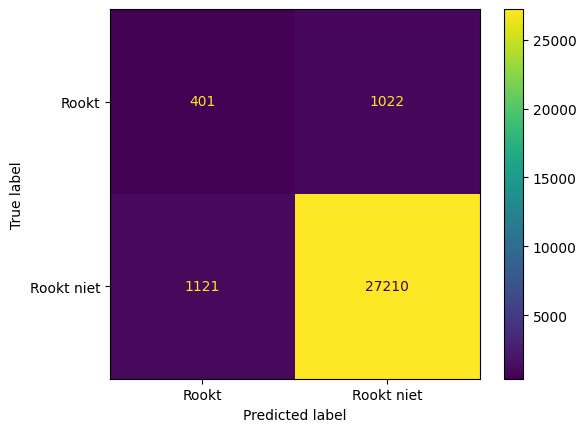

              precision    recall  f1-score   support

       Rookt       0.26      0.28      0.27      1423
  Rookt niet       0.96      0.96      0.96     28331

    accuracy                           0.93     29754
   macro avg       0.61      0.62      0.62     29754
weighted avg       0.93      0.93      0.93     29754



In [14]:
# Ngram 1 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Stochastic Gradient Descent

In [10]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [11]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

# Stopwords kept

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 88.53, NNZs: 243, Bias: 0.000000, T: 71408, Avg. loss: 0.170762
Total training time: 1.60 seconds.
-- Epoch 2
Norm: 127.18, NNZs: 110, Bias: 0.000000, T: 142816, Avg. loss: 0.128095
Total training time: 3.35 seconds.
-- Epoch 3
Norm: 157.80, NNZs: 82, Bias: 0.000000, T: 214224, Avg. loss: 0.110954
Total training time: 5.11 seconds.
-- Epoch 4
Norm: 182.82, NNZs: 67, Bias: 0.000000, T: 285632, Avg. loss: 0.100142
Total training time: 6.88 seconds.
-- Epoch 5
Norm: 204.33, NNZs: 61, Bias: 0.000000, T: 357040, Avg. loss: 0.093277
Total training time: 8.60 seconds.
-- Epoch 6
Norm: 223.43, NNZs: 56, Bias: 0.000000, T: 428448, Avg. loss: 0.088511
Total training time: 9.62 seconds.
-- Epoch 7
Norm: 226.78, NNZs: 56, Bias: 0.000000, T: 499856, Avg. loss: 0.085845
Total training time: 10.86 seconds.
-- Epoch 8
Norm: 230.08, NNZs: 56, Bias: 0.000000, T: 571264, Avg. loss: 0.085234
Total training time: 11.92 seconds.
-

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.145 total time= 2.4min
-- Epoch 1
Norm: 88.48, NNZs: 269, Bias: 0.000000, T: 71408, Avg. loss: 0.170804
Total training time: 1.71 seconds.
-- Epoch 2
Norm: 127.51, NNZs: 114, Bias: 0.000000, T: 142816, Avg. loss: 0.128280
Total training time: 3.49 seconds.
-- Epoch 3
Norm: 157.74, NNZs: 83, Bias: 0.000000, T: 214224, Avg. loss: 0.111124
Total training time: 5.16 seconds.
-- Epoch 4
Norm: 182.90, NNZs: 69, Bias: 0.000000, T: 285632, Avg. loss: 0.100522
Total training time: 6.42 seconds.
-- Epoch 5
Norm: 204.50, NNZs: 65, Bias: 0.000000, T: 357040, Avg. loss: 0.093730
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.144 total time= 2.7min
-- Epoch 1
Norm: 88.55, NNZs: 288, Bias: 0.000000, T: 71408, Avg. loss: 0.171440
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 127.47, NNZs: 109, Bias: 0.000000, T: 142816, Avg. loss: 0.129007
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 157.84, NNZs: 83, Bias: 0.000000, T: 214224, Avg. loss: 0.111704
Total training time: 3.40 seconds.
-- Epoch 4
Norm: 183.00, NNZs: 70, Bias: 0.000000, T: 285632, Avg. loss: 0.101105
Total training time: 4.22 seconds.
-- Epoch 5
Norm: 204.73, NNZs: 62, Bias: 0.000000, T: 357040, Avg. loss: 0.094235
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.149 total time= 2.6min
-- Epoch 1
Norm: 88.45, NNZs: 272, Bias: 0.000000, T: 71408, Avg. loss: 0.172578
Total training time: 1.65 seconds.
-- Epoch 2
Norm: 127.54, NNZs: 115, Bias: 0.000000, T: 142816, Avg. loss: 0.129267
Total training time: 3.48 seconds.
-- Epoch 3
Norm: 157.86, NNZs: 87, Bias: 0.000000, T: 214224, Avg. loss: 0.112218
Total training time: 5.27 seconds.
-- Epoch 4
Norm: 183.10, NNZs: 72, Bias: 0.000000, T: 285632, Avg. loss: 0.101588
Total training time: 7.05 seconds.
-- Epoch 5
Norm: 204.95, NNZs: 66, Bias: 0.000000, T: 357040, Avg. loss: 0.094650
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.141 total time= 2.7min
-- Epoch 1
Norm: 88.54, NNZs: 249, Bias: 0.000000, T: 71409, Avg. loss: 0.172434
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 127.43, NNZs: 114, Bias: 0.000000, T: 142818, Avg. loss: 0.129817
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 157.62, NNZs: 82, Bias: 0.000000, T: 214227, Avg. loss: 0.112335
Total training time: 3.20 seconds.
-- Epoch 4
Norm: 182.78, NNZs: 69, Bias: 0.000000, T: 285636, Avg. loss: 0.101824
Total training time: 4.37 seconds.
-- Epoch 5
Norm: 204.61, NNZs: 65, Bias: 0.000000, T: 357045, Avg. loss: 0.094935
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.144 total time= 2.4min
-- Epoch 1
Norm: 95534329111510.78, NNZs: 548960, Bias: 0.000000, T: 71408, Avg. loss: 71347060630350658011136.000000
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 89853995773505.80, NNZs: 548965, Bias: 0.000000, T: 142816, Avg. loss: 74998821834333616078848.000000
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 86910789222510.41, NNZs: 548965, Bias: 0.000000, T: 214224, Avg. loss: 62010448347952698097664.000000
Total training time: 3.42 seconds.
-- Epoch 4
Norm: 84960960409326.59, NNZs: 548965, Bias: 0.000000, T: 285632, Avg. loss: 559510108017906

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.973 total time= 1.7min
-- Epoch 1
Norm: 134.21, NNZs: 374, Bias: 0.000000, T: 71408, Avg. loss: 0.076498
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 171.99, NNZs: 114, Bias: 0.000000, T: 142816, Avg. loss: 0.040454
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 199.53, NNZs: 106, Bias: 0.000000, T: 214224, Avg. loss: 0.034780
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 221.82, NNZs: 98, Bias: 0.000000, T: 285632, Avg. loss: 0.031574
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 241.19, NNZs: 93, Bias: 0.000000, T: 357040, Avg. loss: 0.029847
Total tr

[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.248 total time= 1.3min
-- Epoch 1
Norm: 127.65, NNZs: 397, Bias: 0.000000, T: 71408, Avg. loss: 0.159356
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 164.42, NNZs: 247, Bias: 0.000000, T: 142816, Avg. loss: 0.103308
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 193.70, NNZs: 214, Bias: 0.000000, T: 214224, Avg. loss: 0.107001
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 217.84, NNZs: 203, Bias: 0.000000, T: 285632, Avg. loss: 0.103497
Total training time: 2.23 seconds.
-- Epoch 5
Norm: 239.62, NNZs: 211, Bias: 0.000000, T: 357040, Avg. loss: 0.102077
To

Norm: 4.01, NNZs: 886296, Bias: 0.531116, T: 428454, Avg. loss: 0.026778
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.65 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.488 total time= 1.6min
-- Epoch 1
Norm: 15.60, NNZs: 525970, Bias: 0.800276, T: 71408, Avg. loss: 0.072519
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 14.31, NNZs: 581698, Bias: 0.780308, T: 142816, Avg. loss: 0.048295
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 14.04, NNZs: 612441, Bias: 0.760552, T: 214224, Avg. loss: 0.046914
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 13.93, NNZs: 629922, Bias: 0.752881

Norm: 388.26, NNZs: 103, Bias: 0.000000, T: 142816, Avg. loss: 0.074458
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 434.48, NNZs: 85, Bias: 0.000000, T: 214224, Avg. loss: 0.073538
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 471.76, NNZs: 81, Bias: 0.000000, T: 285632, Avg. loss: 0.073821
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 503.69, NNZs: 76, Bias: 0.000000, T: 357040, Avg. loss: 0.071676
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 532.75, NNZs: 75, Bias: 0.000000, T: 428448, Avg. loss: 0.073790
Total training time: 2.27 seconds.
Convergence after 6 epochs took 2.33 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max

-- Epoch 1
Norm: 0.93, NNZs: 548899, Bias: 0.000000, T: 71408, Avg. loss: 0.757766
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 548899, Bias: 0.000000, T: 142816, Avg. loss: 0.781922
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 1.24, NNZs: 548899, Bias: 0.000000, T: 214224, Avg. loss: 0.786382
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 1.31, NNZs: 548899, Bias: 0.000000, T: 285632, Avg. loss: 0.787940
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 548899, Bias: 0.000000, T: 357040, Avg. loss: 0.788625
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 1.43, NNZs: 548899, Bias: 0.000000, T: 428448, Avg. loss: 0.788602
Total training time: 1.58 seconds.
Convergence after 6 epochs took 1.68 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insens

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.707 total time= 1.7min
-- Epoch 1
Norm: 55.19, NNZs: 548075, Bias: 0.000000, T: 71408, Avg. loss: 0.409772
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 55.18, NNZs: 548075, Bias: 0.000000, T: 142816, Avg. loss: 0.381867
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 55.18, NNZs: 548075, Bias: 0.000000, T: 214224, Avg. loss: 0.381921
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 55.18, NNZs: 548075, Bias: 0.000000, T: 285632, Avg. loss: 0.381921
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 55.18, NNZs: 548075, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.703 total time= 1.7min
-- Epoch 1
Norm: 55.30, NNZs: 549538, Bias: 0.000000, T: 71408, Avg. loss: 0.407579
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 55.30, NNZs: 549538, Bias: 0.000000, T: 142816, Avg. loss: 0.380086
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 55.30, NNZs: 549538, Bias: 0.000000, T: 214224, Avg. loss: 0.380141
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 55.30, NNZs: 549538, Bias: 0.000000, T: 285632, Avg. loss: 0.380141
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 55.30, NNZs: 549538, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.705 total time= 1.5min
-- Epoch 1
Norm: 55.48, NNZs: 548880, Bias: 0.000000, T: 71408, Avg. loss: 0.407650
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 55.48, NNZs: 548880, Bias: 0.000000, T: 142816, Avg. loss: 0.379797
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 55.48, NNZs: 548880, Bias: 0.000000, T: 214224, Avg. loss: 0.379853
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 55.48, NNZs: 548880, Bias: 0.000000, T: 285632, Avg. loss: 0.379853
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 55.48, NNZs: 548880, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.703 total time= 1.3min
-- Epoch 1
Norm: 54.78, NNZs: 548203, Bias: 0.000000, T: 71409, Avg. loss: 0.408122
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 54.78, NNZs: 548203, Bias: 0.000000, T: 142818, Avg. loss: 0.380535
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 54.78, NNZs: 548203, Bias: 0.000000, T: 214227, Avg. loss: 0.380588
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 54.78, NNZs: 548203, Bias: 0.000000, T: 285636, Avg. loss: 0.380589
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 54.78, NNZs: 548203, Bias: 0.000000, T: 357045, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.699 total time= 1.4min
-- Epoch 1
Norm: 26.70, NNZs: 410082, Bias: 0.449187, T: 71408, Avg. loss: 0.070448
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 15.78, NNZs: 436306, Bias: 0.329657, T: 142816, Avg. loss: 0.003449
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 11.41, NNZs: 443459, Bias: 0.271710, T: 214224, Avg. loss: 0.001226
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 8.98, NNZs: 446711, Bias: 0.241270, T: 285632, Avg. loss: 0.000577
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 7.51, NNZs: 449150, Bias: 0.213023, T: 357040, Avg. loss: 0.0

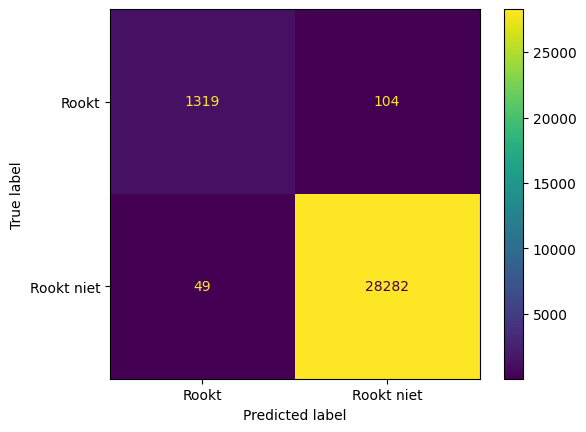

              precision    recall  f1-score   support

       Rookt       0.96      0.93      0.95      1423
  Rookt niet       1.00      1.00      1.00     28331

    accuracy                           0.99     29754
   macro avg       0.98      0.96      0.97     29754
weighted avg       0.99      0.99      0.99     29754



In [18]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 89.02, NNZs: 427, Bias: 0.000000, T: 71408, Avg. loss: 0.186116
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 127.49, NNZs: 119, Bias: 0.000000, T: 142816, Avg. loss: 0.146079
Total training time: 2.69 seconds.
-- Epoch 3
Norm: 157.79, NNZs: 82, Bias: 0.000000, T: 214224, Avg. loss: 0.129343
Total training time: 4.05 seconds.
-- Epoch 4
Norm: 183.80, NNZs: 70, Bias: 0.000000, T: 285632, Avg. loss: 0.118547
Total training time: 5.41 seconds.
-- Epoch 5
Norm: 206.34, NNZs: 60, Bias: 0.000000, T: 357040, Avg. loss: 0.111171
Total training time: 6.78 seconds.
-- Epoch 6
Norm: 226.56, NNZs: 56, Bias: 0.000000, T: 428448, Avg. loss: 0.105327
Total training time: 8.13 seconds.
-- Epoch 7
Norm: 230.07, NNZs: 56, Bias: 0.000000, T: 499856, Avg. loss: 0.102469
Total training time: 9.47 seconds.
-- Epoch 8
Norm: 233.58, NNZs: 55, Bias: 0.000000, T: 571264, Avg. loss: 0.101669
Total training time: 10.80 seconds.
--

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.165 total time= 2.8min
-- Epoch 1
Norm: 88.74, NNZs: 367, Bias: 0.000000, T: 71408, Avg. loss: 0.186146
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 127.28, NNZs: 120, Bias: 0.000000, T: 142816, Avg. loss: 0.146045
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 157.87, NNZs: 82, Bias: 0.000000, T: 214224, Avg. loss: 0.129505
Total training time: 3.90 seconds.
-- Epoch 4
Norm: 183.64, NNZs: 71, Bias: 0.000000, T: 285632, Avg. loss: 0.118561
Total training time: 5.25 seconds.
-- Epoch 5
Norm: 206.30, NNZs: 59, Bias: 0.000000, T: 357040, Avg. loss: 0.111138
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.157 total time= 2.7min
-- Epoch 1
Norm: 88.99, NNZs: 367, Bias: 0.000000, T: 71408, Avg. loss: 0.187352
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 127.47, NNZs: 118, Bias: 0.000000, T: 142816, Avg. loss: 0.147111
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 158.02, NNZs: 82, Bias: 0.000000, T: 214224, Avg. loss: 0.130595
Total training time: 4.29 seconds.
-- Epoch 4
Norm: 183.96, NNZs: 72, Bias: 0.000000, T: 285632, Avg. loss: 0.119546
Total training time: 5.67 seconds.
-- Epoch 5
Norm: 206.64, NNZs: 62, Bias: 0.000000, T: 357040, Avg. loss: 0.112046
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.167 total time= 2.8min
-- Epoch 1
Norm: 87.96, NNZs: 372, Bias: 0.000000, T: 71408, Avg. loss: 0.187541
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 127.04, NNZs: 117, Bias: 0.000000, T: 142816, Avg. loss: 0.147146
Total training time: 2.57 seconds.
-- Epoch 3
Norm: 157.70, NNZs: 84, Bias: 0.000000, T: 214224, Avg. loss: 0.130646
Total training time: 3.85 seconds.
-- Epoch 4
Norm: 183.66, NNZs: 73, Bias: 0.000000, T: 285632, Avg. loss: 0.119679
Total training time: 5.15 seconds.
-- Epoch 5
Norm: 206.46, NNZs: 62, Bias: 0.000000, T: 357040, Avg. loss: 0.112084
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.161 total time= 2.8min
-- Epoch 1
Norm: 88.48, NNZs: 388, Bias: 0.000000, T: 71409, Avg. loss: 0.188171
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 127.12, NNZs: 118, Bias: 0.000000, T: 142818, Avg. loss: 0.147397
Total training time: 2.83 seconds.
-- Epoch 3
Norm: 157.67, NNZs: 83, Bias: 0.000000, T: 214227, Avg. loss: 0.131238
Total training time: 4.25 seconds.
-- Epoch 4
Norm: 183.71, NNZs: 74, Bias: 0.000000, T: 285636, Avg. loss: 0.120270
Total training time: 5.61 seconds.
-- Epoch 5
Norm: 206.36, NNZs: 64, Bias: 0.000000, T: 357045, Avg. loss: 0.112675
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.163 total time= 2.7min
-- Epoch 1
Norm: 95650553484166.92, NNZs: 1067731, Bias: 0.000000, T: 71408, Avg. loss: 59731837217930794237952.000000
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 90159919823357.92, NNZs: 1067741, Bias: 0.000000, T: 142816, Avg. loss: 77640695760689978933248.000000
Total training time: 1.56 seconds.
-- Epoch 3
Norm: 87285618483016.95, NNZs: 1067741, Bias: 0.000000, T: 214224, Avg. loss: 65261515379389243588608.000000
Total training time: 2.37 seconds.
-- Epoch 4
Norm: 85370455219223.89, NNZs: 1067741, Bias: 0.000000, T: 285632, Avg. loss: 59299614088

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.968 total time= 2.4min
-- Epoch 1
Norm: 143.21, NNZs: 625, Bias: 0.000000, T: 71408, Avg. loss: 0.086834
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 185.68, NNZs: 130, Bias: 0.000000, T: 142816, Avg. loss: 0.049023
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 216.62, NNZs: 111, Bias: 0.000000, T: 214224, Avg. loss: 0.042215
Total training time: 2.28 seconds.
-- Epoch 4
Norm: 241.60, NNZs: 100, Bias: 0.000000, T: 285632, Avg. loss: 0.038539
Total training time: 3.03 seconds.
-- Epoch 5
Norm: 263.21, NNZs: 95, Bias: 0.000000, T: 357040, Avg. loss: 0.035735
Total t

Norm: 42753920411518.35, NNZs: 1067224, Bias: 0.000000, T: 142816, Avg. loss: 23990034484463138766848.000000
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 68356197777406.30, NNZs: 1067234, Bias: 0.000000, T: 214224, Avg. loss: 51756398624298992926720.000000
Total training time: 2.97 seconds.
-- Epoch 4
Norm: 81606513823193.69, NNZs: 1067232, Bias: 0.000000, T: 285632, Avg. loss: 96739180473126848823296.000000
Total training time: 3.99 seconds.
-- Epoch 5
Norm: 85667231418582.41, NNZs: 1067234, Bias: 0.000000, T: 357040, Avg. loss: 122047891927648671105024.000000
Total training time: 5.09 seconds.
-- Epoch 6
Norm: 87510022480540.16, NNZs: 1067233, Bias: 0.000000, T: 428448, Avg. loss: 130636263096379240349696.000000
Total training time: 6.13 seconds.
Convergence after 6 epochs took 6.21 seconds
[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__le

Norm: 3.97, NNZs: 1883007, Bias: 0.581639, T: 428448, Avg. loss: 0.026352
Total training time: 3.46 seconds.
Convergence after 6 epochs took 3.56 seconds
[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.488 total time= 2.2min
-- Epoch 1
Norm: 3.88, NNZs: 1880815, Bias: 0.412225, T: 71409, Avg. loss: 0.059474
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 3.95, NNZs: 1880815, Bias: 0.480768, T: 142818, Avg. loss: 0.035471
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 3.98, NNZs: 1880815, Bias: 0.520267, T: 214227, Avg. loss: 0.030627
Total training time: 1.70 seconds.
-- Epoch 4
Norm: 3.99, NNZs: 1880815, Bias: 0.54723

Norm: 418.99, NNZs: 129, Bias: 0.000000, T: 142816, Avg. loss: 0.105251
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 475.31, NNZs: 107, Bias: 0.000000, T: 214224, Avg. loss: 0.094773
Total training time: 1.53 seconds.
-- Epoch 4
Norm: 518.38, NNZs: 86, Bias: 0.000000, T: 285632, Avg. loss: 0.094276
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 555.80, NNZs: 80, Bias: 0.000000, T: 357040, Avg. loss: 0.087354
Total training time: 2.47 seconds.
-- Epoch 6
Norm: 588.40, NNZs: 77, Bias: 0.000000, T: 428448, Avg. loss: 0.085758
Total training time: 2.93 seconds.
Convergence after 6 epochs took 3.00 seconds
[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__ma

-- Epoch 1
Norm: 0.96, NNZs: 1067268, Bias: 0.000000, T: 71408, Avg. loss: 0.737510
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 1067268, Bias: 0.000000, T: 142816, Avg. loss: 0.745753
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 1067268, Bias: 0.000000, T: 214224, Avg. loss: 0.745809
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 1.18, NNZs: 1067268, Bias: 0.000000, T: 285632, Avg. loss: 0.745111
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 1.23, NNZs: 1067268, Bias: 0.000000, T: 357040, Avg. loss: 0.744616
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 1067268, Bias: 0.000000, T: 428448, Avg. loss: 0.743953
Total training time: 1.91 seconds.
Convergence after 6 epochs took 1.98 seconds
[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.711 total time= 2.2min
-- Epoch 1
Norm: 55.86, NNZs: 1065413, Bias: 0.000000, T: 71408, Avg. loss: 0.425478
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 55.85, NNZs: 1065413, Bias: 0.000000, T: 142816, Avg. loss: 0.397212
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 55.85, NNZs: 1065413, Bias: 0.000000, T: 214224, Avg. loss: 0.397272
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 55.85, NNZs: 1065413, Bias: 0.000000, T: 285632, Avg. loss: 0.397272
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 55.85, NNZs: 1065413, Bias: 0.000000, T: 357040, Avg. lo

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.705 total time= 2.2min
-- Epoch 1
Norm: 56.03, NNZs: 1067270, Bias: 0.000000, T: 71408, Avg. loss: 0.423723
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 56.02, NNZs: 1067270, Bias: 0.000000, T: 142816, Avg. loss: 0.395812
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 56.02, NNZs: 1067270, Bias: 0.000000, T: 214224, Avg. loss: 0.395874
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 56.02, NNZs: 1067270, Bias: 0.000000, T: 285632, Avg. loss: 0.395874
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 56.02, NNZs: 1067270, Bias: 0.000000, T: 357040, Avg. lo

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.706 total time= 2.2min
-- Epoch 1
Norm: 56.22, NNZs: 1066956, Bias: 0.000000, T: 71408, Avg. loss: 0.423594
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 56.21, NNZs: 1066956, Bias: 0.000000, T: 142816, Avg. loss: 0.395484
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 56.21, NNZs: 1066956, Bias: 0.000000, T: 214224, Avg. loss: 0.395546
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 56.21, NNZs: 1066956, Bias: 0.000000, T: 285632, Avg. loss: 0.395546
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 56.21, NNZs: 1066956, Bias: 0.000000, T: 357040, Avg. lo

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.703 total time= 2.2min
-- Epoch 1
Norm: 55.48, NNZs: 1064869, Bias: 0.000000, T: 71409, Avg. loss: 0.423896
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 55.48, NNZs: 1064869, Bias: 0.000000, T: 142818, Avg. loss: 0.395680
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 55.48, NNZs: 1064869, Bias: 0.000000, T: 214227, Avg. loss: 0.395741
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 55.48, NNZs: 1064869, Bias: 0.000000, T: 285636, Avg. loss: 0.395741
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 55.48, NNZs: 1064869, Bias: 0.000000, T: 357045, Avg. lo

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.700 total time= 2.1min
-- Epoch 1
Norm: 25.87, NNZs: 753471, Bias: 0.328594, T: 71408, Avg. loss: 0.068432
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 15.28, NNZs: 803947, Bias: 0.231089, T: 142816, Avg. loss: 0.004916
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 11.05, NNZs: 821331, Bias: 0.185473, T: 214224, Avg. loss: 0.001932
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 8.72, NNZs: 830253, Bias: 0.163344, T: 285632, Avg. loss: 0.001071
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 7.20, NNZs: 833850, Bias: 0.141895, T: 357040, Avg. loss: 0.0

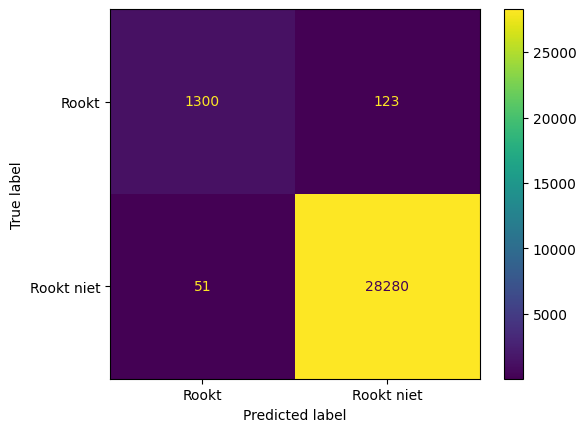

              precision    recall  f1-score   support

       Rookt       0.96      0.91      0.94      1423
  Rookt niet       1.00      1.00      1.00     28331

    accuracy                           0.99     29754
   macro avg       0.98      0.96      0.97     29754
weighted avg       0.99      0.99      0.99     29754



In [12]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [13]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 92.85, NNZs: 294, Bias: 0.000000, T: 71408, Avg. loss: 0.170889
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 133.00, NNZs: 113, Bias: 0.000000, T: 142816, Avg. loss: 0.124823
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 163.82, NNZs: 93, Bias: 0.000000, T: 214224, Avg. loss: 0.106910
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 189.28, NNZs: 83, Bias: 0.000000, T: 285632, Avg. loss: 0.096594
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 211.07, NNZs: 75, Bias: 0.000000, T: 357040, Avg. loss: 0.090151
Total training time: 2.39 seconds.
-- Epoch 6
Norm: 230.19, NNZs: 70, Bias: 0.000000, T: 428448, Avg. loss: 0.085706
Total training time: 2.91 seconds.
-- Epoch 7
Norm: 233.65, NNZs: 69, Bias: 0.000000, T: 499856, Avg. loss: 0.083187
Total training time: 3.44 seconds.
-- Epoch 8
Norm: 236.98, NNZs: 67, Bias: 0.000000, T: 571264, Avg. loss: 0.082508
Total training time: 3.98 seconds.
-- 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.150 total time= 1.1min
-- Epoch 1
Norm: 93.00, NNZs: 295, Bias: 0.000000, T: 71408, Avg. loss: 0.171167
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 132.93, NNZs: 117, Bias: 0.000000, T: 142816, Avg. loss: 0.124968
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 163.63, NNZs: 94, Bias: 0.000000, T: 214224, Avg. loss: 0.107911
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 189.10, NNZs: 81, Bias: 0.000000, T: 285632, Avg. loss: 0.097429
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 210.67, NNZs: 76, Bias: 0.000000, T: 357040, Avg. loss: 0.090872
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.145 total time= 1.1min
-- Epoch 1
Norm: 92.98, NNZs: 286, Bias: 0.000000, T: 71408, Avg. loss: 0.171087
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 133.29, NNZs: 111, Bias: 0.000000, T: 142816, Avg. loss: 0.124982
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 164.08, NNZs: 92, Bias: 0.000000, T: 214224, Avg. loss: 0.107501
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 189.57, NNZs: 84, Bias: 0.000000, T: 285632, Avg. loss: 0.097183
Total training time: 1.83 seconds.
-- Epoch 5
Norm: 211.38, NNZs: 80, Bias: 0.000000, T: 357040, Avg. loss: 0.090682
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.155 total time= 1.1min
-- Epoch 1
Norm: 93.13, NNZs: 309, Bias: 0.000000, T: 71408, Avg. loss: 0.171269
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 133.14, NNZs: 125, Bias: 0.000000, T: 142816, Avg. loss: 0.125513
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 164.07, NNZs: 93, Bias: 0.000000, T: 214224, Avg. loss: 0.107458
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 189.55, NNZs: 84, Bias: 0.000000, T: 285632, Avg. loss: 0.097175
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 211.47, NNZs: 80, Bias: 0.000000, T: 357040, Avg. loss: 0.090497
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.152 total time= 1.1min
-- Epoch 1
Norm: 93.20, NNZs: 291, Bias: 0.000000, T: 71409, Avg. loss: 0.171281
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 132.85, NNZs: 111, Bias: 0.000000, T: 142818, Avg. loss: 0.125825
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 163.61, NNZs: 92, Bias: 0.000000, T: 214227, Avg. loss: 0.107917
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 188.95, NNZs: 81, Bias: 0.000000, T: 285636, Avg. loss: 0.097893
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 210.80, NNZs: 74, Bias: 0.000000, T: 357045, Avg. loss: 0.091296
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.150 total time= 1.1min
-- Epoch 1
Norm: 96001328089836.97, NNZs: 498690, Bias: 0.000000, T: 71408, Avg. loss: 74290668790475393073152.000000
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 90293380241726.23, NNZs: 498692, Bias: 0.000000, T: 142816, Avg. loss: 74815008945441842659328.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 87342983587909.09, NNZs: 498692, Bias: 0.000000, T: 214224, Avg. loss: 61771024020562887311360.000000
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 85376227225059.64, NNZs: 498692, Bias: 0.000000, T: 285632, Avg. loss: 557716575845340

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.955 total time= 1.0min
-- Epoch 1
Norm: 132.55, NNZs: 379, Bias: 0.000000, T: 71408, Avg. loss: 0.075607
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 170.06, NNZs: 120, Bias: 0.000000, T: 142816, Avg. loss: 0.041769
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 197.42, NNZs: 109, Bias: 0.000000, T: 214224, Avg. loss: 0.036298
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 219.85, NNZs: 101, Bias: 0.000000, T: 285632, Avg. loss: 0.033188
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 239.15, NNZs: 99, Bias: 0.000000, T: 357040, Avg. loss: 0.031213
Total t

[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.231 total time= 1.0min
-- Epoch 1
Norm: 124.81, NNZs: 370, Bias: 0.000000, T: 71408, Avg. loss: 0.154405
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 162.16, NNZs: 265, Bias: 0.000000, T: 142816, Avg. loss: 0.107504
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 190.16, NNZs: 242, Bias: 0.000000, T: 214224, Avg. loss: 0.102041
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 213.95, NNZs: 231, Bias: 0.000000, T: 285632, Avg. loss: 0.102406
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 235.19, NNZs: 215, Bias: 0.000000, T: 357040, Avg. loss: 0.103249
To

Norm: 4.08, NNZs: 839154, Bias: 0.557582, T: 428454, Avg. loss: 0.026285
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.53 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.488 total time=  59.9s
-- Epoch 1
Norm: 15.96, NNZs: 478926, Bias: 0.827788, T: 71408, Avg. loss: 0.071167
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 14.75, NNZs: 533032, Bias: 0.800107, T: 142816, Avg. loss: 0.047180
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 14.49, NNZs: 562579, Bias: 0.774445, T: 214224, Avg. loss: 0.045679
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 14.37, NNZs: 580566, Bias: 0.769720

Norm: 371.67, NNZs: 98, Bias: 0.000000, T: 142816, Avg. loss: 0.085416
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 417.36, NNZs: 80, Bias: 0.000000, T: 214224, Avg. loss: 0.082136
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 453.46, NNZs: 77, Bias: 0.000000, T: 285632, Avg. loss: 0.086570
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 483.15, NNZs: 76, Bias: 0.000000, T: 357040, Avg. loss: 0.083139
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 511.04, NNZs: 68, Bias: 0.000000, T: 428448, Avg. loss: 0.084344
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.57 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_

-- Epoch 1
Norm: 0.94, NNZs: 498340, Bias: 0.000000, T: 71408, Avg. loss: 0.753305
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 498340, Bias: 0.000000, T: 142816, Avg. loss: 0.777477
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 1.24, NNZs: 498340, Bias: 0.000000, T: 214224, Avg. loss: 0.781471
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 1.31, NNZs: 498340, Bias: 0.000000, T: 285632, Avg. loss: 0.782084
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 498340, Bias: 0.000000, T: 357040, Avg. loss: 0.781858
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 1.43, NNZs: 498340, Bias: 0.000000, T: 428448, Avg. loss: 0.781489
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.17 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insens

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.715 total time= 1.0min
-- Epoch 1
Norm: 54.55, NNZs: 497721, Bias: 0.000000, T: 71408, Avg. loss: 0.402990
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 54.54, NNZs: 497721, Bias: 0.000000, T: 142816, Avg. loss: 0.374764
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 54.54, NNZs: 497721, Bias: 0.000000, T: 214224, Avg. loss: 0.374814
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 54.54, NNZs: 497721, Bias: 0.000000, T: 285632, Avg. loss: 0.374814
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 54.54, NNZs: 497721, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.705 total time= 1.0min
-- Epoch 1
Norm: 54.69, NNZs: 499155, Bias: 0.000000, T: 71408, Avg. loss: 0.399545
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 54.68, NNZs: 499155, Bias: 0.000000, T: 142816, Avg. loss: 0.371515
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 54.68, NNZs: 499155, Bias: 0.000000, T: 214224, Avg. loss: 0.371565
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 54.68, NNZs: 499155, Bias: 0.000000, T: 285632, Avg. loss: 0.371565
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 54.68, NNZs: 499155, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.710 total time= 1.0min
-- Epoch 1
Norm: 54.81, NNZs: 498349, Bias: 0.000000, T: 71408, Avg. loss: 0.398346
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 54.81, NNZs: 498349, Bias: 0.000000, T: 142816, Avg. loss: 0.370472
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 54.81, NNZs: 498349, Bias: 0.000000, T: 214224, Avg. loss: 0.370522
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 54.81, NNZs: 498349, Bias: 0.000000, T: 285632, Avg. loss: 0.370522
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 54.81, NNZs: 498349, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.708 total time= 1.0min
-- Epoch 1
Norm: 54.30, NNZs: 497896, Bias: 0.000000, T: 71409, Avg. loss: 0.401005
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 54.29, NNZs: 497896, Bias: 0.000000, T: 142818, Avg. loss: 0.373051
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 54.29, NNZs: 497896, Bias: 0.000000, T: 214227, Avg. loss: 0.373100
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 54.29, NNZs: 497896, Bias: 0.000000, T: 285636, Avg. loss: 0.373101
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 54.29, NNZs: 497896, Bias: 0.000000, T: 357045, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.706 total time= 1.0min
-- Epoch 1
Norm: 25.95, NNZs: 357740, Bias: 0.518728, T: 71408, Avg. loss: 0.069239
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 15.45, NNZs: 380836, Bias: 0.374239, T: 142816, Avg. loss: 0.003542
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 11.26, NNZs: 389100, Bias: 0.311731, T: 214224, Avg. loss: 0.001418
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 8.98, NNZs: 392444, Bias: 0.264982, T: 285632, Avg. loss: 0.000707
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 7.54, NNZs: 394484, Bias: 0.233844, T: 357040, Avg. loss: 0.0

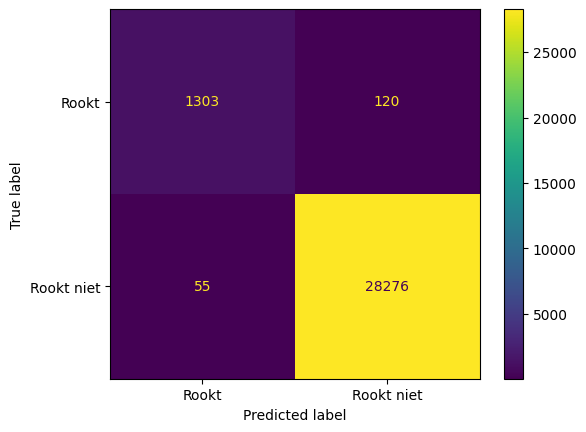

              precision    recall  f1-score   support

       Rookt       0.96      0.92      0.94      1423
  Rookt niet       1.00      1.00      1.00     28331

    accuracy                           0.99     29754
   macro avg       0.98      0.96      0.97     29754
weighted avg       0.99      0.99      0.99     29754



In [14]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# No stopwords

In [15]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 94.64, NNZs: 293, Bias: 0.000000, T: 71408, Avg. loss: 0.169895
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 134.47, NNZs: 119, Bias: 0.000000, T: 142816, Avg. loss: 0.123763
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 165.39, NNZs: 95, Bias: 0.000000, T: 214224, Avg. loss: 0.106162
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 190.79, NNZs: 81, Bias: 0.000000, T: 285632, Avg. loss: 0.095956
Total training time: 1.89 seconds.
-- Epoch 5
Norm: 212.67, NNZs: 75, Bias: 0.000000, T: 357040, Avg. loss: 0.089590
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 231.88, NNZs: 71, Bias: 0.000000, T: 428448, Avg. loss: 0.085198
Total training time: 2.85 seconds.
-- Epoch 7
Norm: 235.31, NNZs: 70, Bias: 0.000000, T: 499856, Avg. loss: 0.082694
Total training time: 3.32 seconds.
-- Epoch 8
Norm: 238.64, NNZs: 69, Bias: 0.000000, T: 571264, Avg. loss: 0.082066
Total training time: 3.79 seconds.
-- 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.134 total time= 1.1min
-- Epoch 1
Norm: 94.32, NNZs: 318, Bias: 0.000000, T: 71408, Avg. loss: 0.169631
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 134.16, NNZs: 123, Bias: 0.000000, T: 142816, Avg. loss: 0.123973
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 164.89, NNZs: 93, Bias: 0.000000, T: 214224, Avg. loss: 0.106110
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 190.36, NNZs: 84, Bias: 0.000000, T: 285632, Avg. loss: 0.095819
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 212.26, NNZs: 79, Bias: 0.000000, T: 357040, Avg. loss: 0.089835
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.132 total time= 1.1min
-- Epoch 1
Norm: 94.46, NNZs: 315, Bias: 0.000000, T: 71408, Avg. loss: 0.170357
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 134.24, NNZs: 120, Bias: 0.000000, T: 142816, Avg. loss: 0.124777
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 164.97, NNZs: 92, Bias: 0.000000, T: 214224, Avg. loss: 0.107268
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 190.32, NNZs: 82, Bias: 0.000000, T: 285632, Avg. loss: 0.097307
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 212.15, NNZs: 77, Bias: 0.000000, T: 357040, Avg. loss: 0.090585
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.139 total time= 1.1min
-- Epoch 1
Norm: 94.01, NNZs: 300, Bias: 0.000000, T: 71408, Avg. loss: 0.170558
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 134.08, NNZs: 127, Bias: 0.000000, T: 142816, Avg. loss: 0.124805
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 164.89, NNZs: 92, Bias: 0.000000, T: 214224, Avg. loss: 0.107061
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 190.23, NNZs: 83, Bias: 0.000000, T: 285632, Avg. loss: 0.096782
Total training time: 1.74 seconds.
-- Epoch 5
Norm: 212.05, NNZs: 77, Bias: 0.000000, T: 357040, Avg. loss: 0.090415
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.139 total time= 1.1min
-- Epoch 1
Norm: 94.33, NNZs: 299, Bias: 0.000000, T: 71409, Avg. loss: 0.169814
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 134.42, NNZs: 114, Bias: 0.000000, T: 142818, Avg. loss: 0.124185
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 165.02, NNZs: 95, Bias: 0.000000, T: 214227, Avg. loss: 0.106648
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 190.29, NNZs: 82, Bias: 0.000000, T: 285636, Avg. loss: 0.096618
Total training time: 1.75 seconds.
-- Epoch 5
Norm: 212.06, NNZs: 77, Bias: 0.000000, T: 357045, Avg. loss: 0.090297
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.137 total time= 1.1min
-- Epoch 1
Norm: 102127117041403.94, NNZs: 499600, Bias: 0.000000, T: 71408, Avg. loss: 86725707205661352263680.000000
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 96235557839161.98, NNZs: 499600, Bias: 0.000000, T: 142816, Avg. loss: 84477677606827645206528.000000
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 93206235496176.12, NNZs: 499600, Bias: 0.000000, T: 214224, Avg. loss: 69990006923356371156992.000000
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 91196215351479.95, NNZs: 499600, Bias: 0.000000, T: 285632, Avg. loss: 63307953186408

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.961 total time= 1.0min
-- Epoch 1
Norm: 132.53, NNZs: 372, Bias: 0.000000, T: 71408, Avg. loss: 0.074999
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 170.23, NNZs: 112, Bias: 0.000000, T: 142816, Avg. loss: 0.040814
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 197.08, NNZs: 100, Bias: 0.000000, T: 214224, Avg. loss: 0.035345
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 219.30, NNZs: 96, Bias: 0.000000, T: 285632, Avg. loss: 0.032448
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 238.69, NNZs: 97, Bias: 0.000000, T: 357040, Avg. loss: 0.031006
Total tr

[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.234 total time= 1.3min
-- Epoch 1
Norm: 123.18, NNZs: 352, Bias: 0.000000, T: 71408, Avg. loss: 0.153681
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 160.94, NNZs: 237, Bias: 0.000000, T: 142816, Avg. loss: 0.107535
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 189.21, NNZs: 235, Bias: 0.000000, T: 214224, Avg. loss: 0.101394
Total training time: 1.54 seconds.
-- Epoch 4
Norm: 213.71, NNZs: 209, Bias: 0.000000, T: 285632, Avg. loss: 0.103126
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 235.08, NNZs: 208, Bias: 0.000000, T: 357040, Avg. loss: 0.103003
To

Norm: 4.12, NNZs: 847498, Bias: 0.567789, T: 428454, Avg. loss: 0.026048
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.87 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.488 total time= 1.1min
-- Epoch 1
Norm: 16.14, NNZs: 489922, Bias: 0.828124, T: 71408, Avg. loss: 0.071133
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 14.85, NNZs: 543421, Bias: 0.792685, T: 142816, Avg. loss: 0.046896
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 14.57, NNZs: 571890, Bias: 0.775778, T: 214224, Avg. loss: 0.045384
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 14.45, NNZs: 589228, Bias: 0.766436

Norm: 452.04, NNZs: 81, Bias: 0.000000, T: 285632, Avg. loss: 0.080062
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 483.34, NNZs: 74, Bias: 0.000000, T: 357040, Avg. loss: 0.080346
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 510.66, NNZs: 67, Bias: 0.000000, T: 428448, Avg. loss: 0.080259
Total training time: 1.61 seconds.
Convergence after 6 epochs took 1.65 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.958 total time= 1.0min
-- Epoch 1
Norm: 301.48, NNZs: 176, Bias: 0.000000, T: 71408, Avg. loss: 0.184380
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 367.57, NNZs: 98, Bias: 0.000000, T: 14281

-- Epoch 3
Norm: 1.22, NNZs: 499129, Bias: 0.000000, T: 214224, Avg. loss: 0.771729
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 499129, Bias: 0.000000, T: 285632, Avg. loss: 0.770964
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 1.35, NNZs: 499129, Bias: 0.000000, T: 357040, Avg. loss: 0.769995
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 1.40, NNZs: 499129, Bias: 0.000000, T: 428448, Avg. loss: 0.769186
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.272 total time= 1.0min
-- Epoch 1
Norm: 0.97, 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.713 total time= 1.1min
-- Epoch 1
Norm: 55.10, NNZs: 498577, Bias: 0.000000, T: 71408, Avg. loss: 0.398506
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 55.09, NNZs: 498577, Bias: 0.000000, T: 142816, Avg. loss: 0.369941
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 55.09, NNZs: 498577, Bias: 0.000000, T: 214224, Avg. loss: 0.369996
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 55.09, NNZs: 498577, Bias: 0.000000, T: 285632, Avg. loss: 0.369996
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 55.09, NNZs: 498577, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.712 total time= 1.1min
-- Epoch 1
Norm: 55.09, NNZs: 499905, Bias: 0.000000, T: 71408, Avg. loss: 0.398996
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 55.09, NNZs: 499905, Bias: 0.000000, T: 142816, Avg. loss: 0.370970
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 55.09, NNZs: 499905, Bias: 0.000000, T: 214224, Avg. loss: 0.371021
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 55.09, NNZs: 499905, Bias: 0.000000, T: 285632, Avg. loss: 0.371021
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 55.09, NNZs: 499905, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.713 total time= 1.1min
-- Epoch 1
Norm: 54.96, NNZs: 499119, Bias: 0.000000, T: 71408, Avg. loss: 0.395675
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 54.95, NNZs: 499119, Bias: 0.000000, T: 142816, Avg. loss: 0.367110
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 54.95, NNZs: 499119, Bias: 0.000000, T: 214224, Avg. loss: 0.367160
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 54.95, NNZs: 499119, Bias: 0.000000, T: 285632, Avg. loss: 0.367160
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 54.95, NNZs: 499119, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.709 total time= 1.1min
-- Epoch 1
Norm: 54.35, NNZs: 498631, Bias: 0.000000, T: 71409, Avg. loss: 0.399466
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 54.35, NNZs: 498631, Bias: 0.000000, T: 142818, Avg. loss: 0.370997
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 54.35, NNZs: 498631, Bias: 0.000000, T: 214227, Avg. loss: 0.371048
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 54.35, NNZs: 498631, Bias: 0.000000, T: 285636, Avg. loss: 0.371049
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 54.35, NNZs: 498631, Bias: 0.000000, T: 357045, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.709 total time= 1.1min
-- Epoch 1
Norm: 25.52, NNZs: 356805, Bias: 0.546250, T: 71408, Avg. loss: 0.065447
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 15.44, NNZs: 383067, Bias: 0.385905, T: 142816, Avg. loss: 0.004057
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 11.26, NNZs: 390756, Bias: 0.323438, T: 214224, Avg. loss: 0.001479
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 8.95, NNZs: 393883, Bias: 0.276881, T: 285632, Avg. loss: 0.000625
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 7.51, NNZs: 396117, Bias: 0.242354, T: 357040, Avg. loss: 0.0

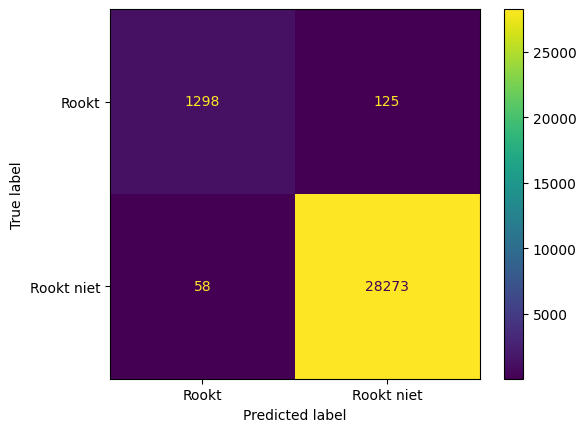

              precision    recall  f1-score   support

       Rookt       0.96      0.91      0.93      1423
  Rookt niet       1.00      1.00      1.00     28331

    accuracy                           0.99     29754
   macro avg       0.98      0.96      0.97     29754
weighted avg       0.99      0.99      0.99     29754



In [16]:
# Ngram 2 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# BEST MODEL

In [17]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [18]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 88.77, NNZs: 235, Bias: 0.000000, T: 71408, Avg. loss: 0.172319
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 127.52, NNZs: 108, Bias: 0.000000, T: 142816, Avg. loss: 0.129472
Total training time: 1.43 seconds.
-- Epoch 3
Norm: 157.89, NNZs: 81, Bias: 0.000000, T: 214224, Avg. loss: 0.112115
Total training time: 2.10 seconds.
-- Epoch 4
Norm: 183.16, NNZs: 70, Bias: 0.000000, T: 285632, Avg. loss: 0.101620
Total training time: 2.77 seconds.
-- Epoch 5
Norm: 204.75, NNZs: 63, Bias: 0.000000, T: 357040, Avg. loss: 0.094713
Total training time: 3.47 seconds.
-- Epoch 6
Norm: 223.90, NNZs: 60, Bias: 0.000000, T: 428448, Avg. loss: 0.089578
Total training time: 4.17 seconds.
-- Epoch 7
Norm: 227.28, NNZs: 60, Bias: 0.000000, T: 499856, Avg. loss: 0.087198
Total training time: 4.86 seconds.
-- Epoch 8
Norm: 230.59, NNZs: 60, Bias: 0.000000, T: 571264, Avg. loss: 0.086421
Total training time: 5.56 seconds.
-- 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.145 total time= 1.5min
-- Epoch 1
Norm: 88.41, NNZs: 249, Bias: 0.000000, T: 71408, Avg. loss: 0.171285
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 127.00, NNZs: 111, Bias: 0.000000, T: 142816, Avg. loss: 0.128952
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 157.34, NNZs: 81, Bias: 0.000000, T: 214224, Avg. loss: 0.111793
Total training time: 2.07 seconds.
-- Epoch 4
Norm: 182.33, NNZs: 66, Bias: 0.000000, T: 285632, Avg. loss: 0.101572
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 204.02, NNZs: 59, Bias: 0.000000, T: 357040, Avg. loss: 0.094627
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.144 total time= 1.5min
-- Epoch 1
Norm: 88.63, NNZs: 254, Bias: 0.000000, T: 71408, Avg. loss: 0.171572
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 126.95, NNZs: 114, Bias: 0.000000, T: 142816, Avg. loss: 0.129219
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 157.17, NNZs: 86, Bias: 0.000000, T: 214224, Avg. loss: 0.112318
Total training time: 2.07 seconds.
-- Epoch 4
Norm: 182.35, NNZs: 73, Bias: 0.000000, T: 285632, Avg. loss: 0.101926
Total training time: 2.76 seconds.
-- Epoch 5
Norm: 203.93, NNZs: 63, Bias: 0.000000, T: 357040, Avg. loss: 0.095140
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.150 total time= 1.5min
-- Epoch 1
Norm: 88.75, NNZs: 247, Bias: 0.000000, T: 71408, Avg. loss: 0.171710
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 127.67, NNZs: 114, Bias: 0.000000, T: 142816, Avg. loss: 0.129176
Total training time: 1.44 seconds.
-- Epoch 3
Norm: 158.08, NNZs: 88, Bias: 0.000000, T: 214224, Avg. loss: 0.112204
Total training time: 2.15 seconds.
-- Epoch 4
Norm: 183.33, NNZs: 73, Bias: 0.000000, T: 285632, Avg. loss: 0.101732
Total training time: 2.88 seconds.
-- Epoch 5
Norm: 205.12, NNZs: 68, Bias: 0.000000, T: 357040, Avg. loss: 0.094828
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.143 total time= 1.5min
-- Epoch 1
Norm: 88.66, NNZs: 255, Bias: 0.000000, T: 71409, Avg. loss: 0.171477
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 127.23, NNZs: 113, Bias: 0.000000, T: 142818, Avg. loss: 0.129233
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 157.42, NNZs: 83, Bias: 0.000000, T: 214227, Avg. loss: 0.111977
Total training time: 2.07 seconds.
-- Epoch 4
Norm: 182.45, NNZs: 68, Bias: 0.000000, T: 285636, Avg. loss: 0.101848
Total training time: 2.80 seconds.
-- Epoch 5
Norm: 204.12, NNZs: 64, Bias: 0.000000, T: 357045, Avg. loss: 0.094884
Total training

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.146 total time= 1.5min
-- Epoch 1
Norm: 98458940440577.67, NNZs: 548958, Bias: 0.000000, T: 71408, Avg. loss: 76515179391096996233216.000000
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 92721534212175.42, NNZs: 548960, Bias: 0.000000, T: 142816, Avg. loss: 79280917321234750898176.000000
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 89764587703583.34, NNZs: 548960, Bias: 0.000000, T: 214224, Avg. loss: 65824328328149865594880.000000
Total training time: 1.50 seconds.
-- Epoch 4
Norm: 87795617095878.03, NNZs: 548960, Bias: 0.000000, T: 285632, Avg. loss: 595465820261579

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.954 total time= 1.3min
-- Epoch 1
Norm: 134.45, NNZs: 397, Bias: 0.000000, T: 71408, Avg. loss: 0.076317
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 172.38, NNZs: 112, Bias: 0.000000, T: 142816, Avg. loss: 0.040552
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 199.73, NNZs: 101, Bias: 0.000000, T: 214224, Avg. loss: 0.033954
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 222.04, NNZs: 100, Bias: 0.000000, T: 285632, Avg. loss: 0.031180
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 241.48, NNZs: 95, Bias: 0.000000, T: 357040, Avg. loss: 0.029712
Total t

[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.250 total time= 1.3min
-- Epoch 1
Norm: 124.90, NNZs: 368, Bias: 0.000000, T: 71408, Avg. loss: 0.160105
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 163.52, NNZs: 250, Bias: 0.000000, T: 142816, Avg. loss: 0.107671
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 192.30, NNZs: 225, Bias: 0.000000, T: 214224, Avg. loss: 0.102558
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 217.26, NNZs: 213, Bias: 0.000000, T: 285632, Avg. loss: 0.103025
Total training time: 2.34 seconds.
-- Epoch 5
Norm: 238.56, NNZs: 206, Bias: 0.000000, T: 357040, Avg. loss: 0.101994
To

Norm: 4.01, NNZs: 886125, Bias: 0.531045, T: 428454, Avg. loss: 0.026803
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.18 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.488 total time= 1.3min
-- Epoch 1
Norm: 15.59, NNZs: 530012, Bias: 0.820001, T: 71408, Avg. loss: 0.073015
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 14.34, NNZs: 585194, Bias: 0.779848, T: 142816, Avg. loss: 0.048304
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 14.05, NNZs: 615394, Bias: 0.769104, T: 214224, Avg. loss: 0.046839
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 13.94, NNZs: 633361, Bias: 0.753971

Norm: 503.47, NNZs: 69, Bias: 0.000000, T: 357040, Avg. loss: 0.080978
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 531.52, NNZs: 75, Bias: 0.000000, T: 428448, Avg. loss: 0.082170
Total training time: 2.04 seconds.
Convergence after 6 epochs took 2.10 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.905 total time= 1.4min
-- Epoch 1
Norm: 314.52, NNZs: 185, Bias: 0.000000, T: 71408, Avg. loss: 0.195420
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 385.44, NNZs: 98, Bias: 0.000000, T: 142816, Avg. loss: 0.085686
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 433.26, NNZs: 88, Bias: 0.000000, T: 21422

-- Epoch 4
Norm: 1.30, NNZs: 548900, Bias: 0.000000, T: 285632, Avg. loss: 0.775832
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 548900, Bias: 0.000000, T: 357040, Avg. loss: 0.775684
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 1.41, NNZs: 548900, Bias: 0.000000, T: 428448, Avg. loss: 0.776010
Total training time: 1.53 seconds.
Convergence after 6 epochs took 1.58 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.244 total time= 1.3min
-- Epoch 1
Norm: 0.95, NNZs: 548228, Bias: 0.000000, T: 71409, Avg. loss: 0.752388
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 1.14, N

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.705 total time= 1.3min
-- Epoch 1
Norm: 55.17, NNZs: 548077, Bias: 0.000000, T: 71408, Avg. loss: 0.409502
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 55.17, NNZs: 548077, Bias: 0.000000, T: 142816, Avg. loss: 0.381469
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 55.17, NNZs: 548077, Bias: 0.000000, T: 214224, Avg. loss: 0.381524
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 55.17, NNZs: 548077, Bias: 0.000000, T: 285632, Avg. loss: 0.381525
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 55.17, NNZs: 548077, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.700 total time= 1.3min
-- Epoch 1
Norm: 55.30, NNZs: 549533, Bias: 0.000000, T: 71408, Avg. loss: 0.406606
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 55.30, NNZs: 549533, Bias: 0.000000, T: 142816, Avg. loss: 0.379083
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 55.30, NNZs: 549533, Bias: 0.000000, T: 214224, Avg. loss: 0.379138
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 55.30, NNZs: 549533, Bias: 0.000000, T: 285632, Avg. loss: 0.379138
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 55.30, NNZs: 549533, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.701 total time= 1.3min
-- Epoch 1
Norm: 55.52, NNZs: 548894, Bias: 0.000000, T: 71408, Avg. loss: 0.409726
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 55.51, NNZs: 548894, Bias: 0.000000, T: 142816, Avg. loss: 0.381878
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 55.51, NNZs: 548894, Bias: 0.000000, T: 214224, Avg. loss: 0.381934
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 55.51, NNZs: 548894, Bias: 0.000000, T: 285632, Avg. loss: 0.381934
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 55.51, NNZs: 548894, Bias: 0.000000, T: 357040, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.701 total time= 1.4min
-- Epoch 1
Norm: 54.84, NNZs: 548227, Bias: 0.000000, T: 71409, Avg. loss: 0.407895
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 54.84, NNZs: 548227, Bias: 0.000000, T: 142818, Avg. loss: 0.379761
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 54.84, NNZs: 548227, Bias: 0.000000, T: 214227, Avg. loss: 0.379818
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 54.84, NNZs: 548227, Bias: 0.000000, T: 285636, Avg. loss: 0.379818
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 54.84, NNZs: 548227, Bias: 0.000000, T: 357045, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.702 total time= 1.3min
-- Epoch 1
Norm: 26.62, NNZs: 413524, Bias: 0.483246, T: 71408, Avg. loss: 0.063768
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 15.70, NNZs: 435431, Bias: 0.350575, T: 142816, Avg. loss: 0.003379
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 11.37, NNZs: 443595, Bias: 0.295065, T: 214224, Avg. loss: 0.001333
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 9.00, NNZs: 447378, Bias: 0.258300, T: 285632, Avg. loss: 0.000585
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 7.56, NNZs: 449698, Bias: 0.227403, T: 357040, Avg. loss: 0.0

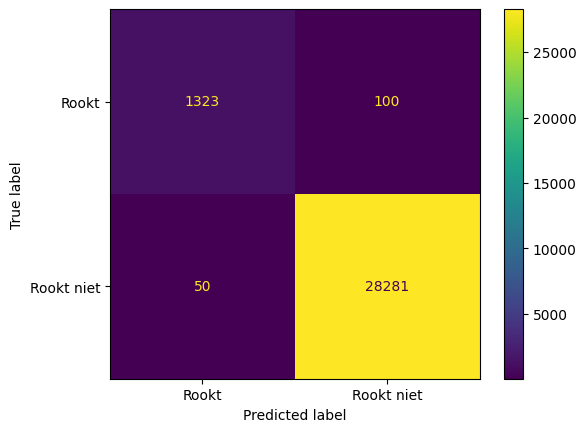

              precision    recall  f1-score   support

       Rookt       0.96      0.93      0.95      1423
  Rookt niet       1.00      1.00      1.00     28331

    accuracy                           0.99     29754
   macro avg       0.98      0.96      0.97     29754
weighted avg       0.99      0.99      0.99     29754



In [19]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

In [20]:
from pickle import dump

dump(random_search, open('best_models/best_smoking_ex2.pkl', 'wb'))